# Plots for AAMAS paper

This notebook will produce the plots from the eval runs 

In [ ]:
import json
import pandas as pd
from pathlib import Path
from tqdm.notebook import tqdm

## Translators

Ignoring the falcom models 
Ran the data through TLDL parser in DIARC

In [ ]:
t_l3_context_fn = "../data/evals/translator-simple_english-30k-context-llama2-3b_evaluation_parsed.json"
t_l7_context_fn = "../data/evals/translator-simple_english-30k-context-llama2-7b_evaluation_parsed.json"

t_l3_fn = "../data/evals/translator-simple_english-30k-no-context-llama2-3b_evaluation_parsed.json"
t_l7_fn = "../data/evals/translator-simple_english-30k-no-context-llama2-7b_evaluation_parsed.json"

all_translators = [t_l3_fn, t_l7_fn, t_l3_context_fn, t_l7_context_fn]

In [ ]:
# Run this cell to get a data table and df for the translators evaluations

from scripts.evaluate import evaluate
from gsp.preparation import deconstruct 

general_table_translators = [] 
metrics = ['valid_json','intent_correct','cpc_name_correct','spc_length_correct','is_isomorphic','is_matched']

for t_fn in tqdm(all_translators, position=0, leave=True, desc="Parsers"):
    filepath = Path(t_fn)
    item = {}
    if "no-context" in filepath.stem:
        model_name = "".join(filepath.stem.split("-")[-2:]).split("_")[0]
    else:
        model_name = "".join(filepath.stem.split("-")[-2:]).split("_")[0] + "_context"
    item['model-name'] = model_name.replace("_","-")

    print(f"Processing model: {model_name}")

    # put in a dataframe
    with open(t_fn, "r") as f:
        t = json.load(f)
    df = pd.DataFrame(t)

    # whether or not the simple english could actually be parsed
    item['is_parsed'] = df.value_counts('is_parsed', normalize=True)[True]

    print("Dataframe initialized with length: ", len(df))
    # deconstruct the parse if there is a parse
    decons = []
    for index, row in tqdm(df.iterrows(), position=1, leave=False, desc="Data items"):
        if row['parse']:
            deconstructed = deconstruct(row['parse'])
        else:
            deconstructed = {}

        decons.append(deconstructed)
    df['deconstructed'] = decons

    # evaluate
    evals = []
    for index, row in tqdm(df.iterrows(), position=1, leave=False, desc="Data items"):
        evaluation = evaluate(row['deconstructed'], row['json_semantics'])
        evals.append(evaluation)
        for metric in metrics:   
            if metric in evaluation:
                df.at[index, metric] = evaluation[metric]
            else:
                df.at[index, metric] = False

    df['evaluation'] = evals

    # "True" Value counts
    for metric in metrics:
        item[metric.replace("_","-")]  = df.value_counts(metric, normalize=True)[True]

    # let's get the precision and recall metrics

    for index, row in df.iterrows():
        if "spc_accuracy" in row['evaluation']:
            if row['evaluation']['spc_accuracy']:
                df.at[index, 'spc_precision'] = row['evaluation']['spc_accuracy']['precision']
                df.at[index, 'spc_recall'] = row['evaluation']['spc_accuracy']['recall']
            else:
                df.at[index, 'spc_precision'] = 0
                df.at[index, 'spc_recall'] = 0

    item['spc-precision'] = df['spc_precision'].mean()
    #item['spc-precision-std'] = df['spc_precision'].std()
    item['spc-recall'] = df['spc_recall'].mean()
    #item['spc-recall-std'] = df['spc_recall'].std()

    df.to_csv(f"{t_fn}_cleaned.csv", index=False)

    general_table_translators.append(item)
df_table = pd.DataFrame(general_table_translators)
df_table.to_csv(f"translators_summary_table.csv", index=False)

In [ ]:
df_table_trans = pd.DataFrame(general_table_translators)
print(df_table_trans.to_latex(index=False))
df_table_trans.head()

## Parsers

For now, I'm ignoring the Falcon models.

In [ ]:
#p_f7_context_fn = "../data/evals/parser-info_structure-30k-context-falcon-7b_evaluation.json"
p_l3_context_fn = "../data/evals/parser-info_structure-30k-context-llama2-3b_evaluation.json"
p_l7_context_fn = "../data/evals/parser-info_structure-30k-context-llama2-7b_evaluation.json"

#p_f7_fn = "../data/evals/parser-info_structure-30k-no-context-falcon-7b_evaluation.json"
p_l3_fn= "../data/evals/parser-info_structure-30k-no-context-llama2-3b_evaluation.json"
p_l7_fn = "../data/evals/parser-info_structure-30k-no-context-llama2-7b_evaluation.json"


parsers_fn = [p_l3_fn, p_l7_fn]
parsers_context_fn = [p_l3_context_fn, p_l7_context_fn]
all_parsers = parsers_fn + parsers_context_fn

### General Table

In [ ]:
# This generates a summary table and cleaned eval files for the parsers experiments.
# the cleaned ones can be used for ploitting 

general_table = []

for p_fn in tqdm(all_parsers, position=0, leave=True, desc="Parsers"):
    filepath = Path(p_fn)
    item = {}
    if "no-context" in filepath.stem:
        model_name = "".join(filepath.stem.split("-")[-2:]).split("_")[0]
    else:
        model_name = "".join(filepath.stem.split("-")[-2:]).split("_")[0] + "_context"
    item['model-name'] = model_name.replace("_","-")

    print(f"Processing model: {model_name}")

    # get the dataframe
    with open(p_fn, "r") as f:
        p = json.load(f)
    df = pd.DataFrame(p)

. 
\begin{enumerate}
    \item \textbf{Directness:} makes the utterance more indirect and polite    metrics = ['valid_json','intent_correct','cpc_name_correct','spc_length_correct','is_isomorphic','is_matched']

    # Iterate through DF and add columns
    for index, row in tqdm(df.iterrows(), position=1, leave=False, desc="Data items"):
        for metric in metrics:   
            if metric in row['evaluation']:
                df.at[index, metric] = row['evaluation'][metric]
            else:
                df.at[index, metric] = False
            
    # "True" Value counts
    for metric in metrics:
        item[metric.replace("_","-")]  = df.value_counts(metric, normalize=True)[True]

    # let's get the precision and recall metrics

    for index, row in df.iterrows():
        if "spc_accuracy" in row['evaluation']:
            if row['evaluation']['spc_accuracy']:
                df.at[index, 'spc_precision'] = row['evaluation']['spc_accuracy']['precision']
                df.at[index, 'spc_recall'] = row['evaluation']['spc_accuracy']['recall']
            else:
                df.at[index, 'spc_precision'] = 0
                df.at[index, 'spc_recall'] = 0

    item['spc-precision'] = df['spc_precision'].mean()
    #item['spc-precision-std'] = df['spc_precision'].std()
    item['spc-recall'] = df['spc_recall'].mean()
    #item['spc-recall-std'] = df['spc_recall'].std()

    # will need to handle accuracy separately
    df.to_csv(f"{p_fn}_cleaned.csv", index=False)
    general_table.append(item)   

df_table = pd.DataFrame(general_table)
df_table.to_csv(f"parsers_summary_table.csv", index=False)

In [ ]:
df_table = pd.DataFrame(general_table)

In [ ]:
df_table.head()

In [ ]:
print(df_table.to_latex(index=False))

## PLOTTING

I need to merge the datasets and plot them 

In [ ]:
## PARSERS 

#p_f7_context_fn = "../data/evals/parser-info_structure-30k-context-falcon-7b_evaluation.json"
p_l3_context_fn_c = "../data/evals/parser-info_structure-30k-context-llama2-3b_evaluation.json_cleaned.csv"
p_l7_context_fn_c = "../data/evals/parser-info_structure-30k-context-llama2-7b_evaluation.json_cleaned.csv"

#p_f7_fn = "../data/evals/parser-info_structure-30k-no-context-falcon-7b_evaluation.json"
p_l3_fn_c = "../data/evals/parser-info_structure-30k-no-context-llama2-3b_evaluation.json_cleaned.csv"
p_l7_fn_c = "../data/evals/parser-info_structure-30k-no-context-llama2-7b_evaluation.json_cleaned.csv"


parsers_fn_c = [p_l3_fn_c, p_l7_fn_c]
parsers_context_fn_c = [p_l3_context_fn_c, p_l7_context_fn_c]
all_parsers_c = parsers_fn_c + parsers_context_fn_c

In [ ]:
from tqdm.notebook import tqdm 
import pandas as pd

dfs = []
for p in tqdm(all_parsers_c):
    print(p)
    df = pd.read_csv(p)
    print(len(df))
    dfs.append(df)
print("concatenating")
df = pd.concat(dfs)

In [ ]:
df.iloc[0]

In [ ]:
# Plotting 

import matplotlib.pyplot as plt
import numpy as np
import re

def camel_case_split(identifier):
    matches = re.finditer('.+?(?:(?<=[a-z])(?=[A-Z])|(?<=[A-Z])(?=[A-Z][a-z])|$)', identifier)
    return [m.group(0) for m in matches]
    
def get_model_name(text):
    if "no-context" in text:
        return "-".join(text.split("/")[1].split("-")[-2:])
    else:
        return "-".join(text.split("/")[1].split("-")[-2:]) + "_context"

def get_style_name(text):
    t = text.split(":")[1]
    return camel_case_split(t)[0].lower()

# shorten the names of the models 
# get all unique names - this can easily hande a couple tenthousand names
models = set(df["model"])
styles = set(df["stylizer"])

# create mapper: you would use fake.last_name() instead of 42+i
# mapper = {k: fake.last_name() for k in all_names }
mapper = {m: get_model_name(m)  for m in models}
mapper_styles = {s: get_style_name(s) for s in styles}

# apply it
df["model"] = df["model"].map(mapper)
df["stylizer"] = df['stylizer'].map(mapper_styles)

# List of evaluation columns
eval_columns = ['valid_json', 'intent_correct', 'cpc_name_correct','spc_length_correct', 'is_isomorphic', 'is_matched']

# Get unique styles
styles = df['stylizer'].unique()

# Create subplots for each evaluation
fig, axes = plt.subplots(len(eval_columns), figsize=(10, 8), sharex=True)

# Define hatching patterns for models (for shading)
hatch_patterns = ['/', '\\', '|', '-', '+', 'x', 'o']

# Iterate through each evaluation and plot grouped bars for each style
for i, eval_col in enumerate(eval_columns):
    ax = axes[i]
    ax.set_title(f'{eval_col} Counts by Style')
    
    # Filter the DataFrame for the current evaluation column
    eval_df = df[['stylizer', 'model', eval_col]]
    
    # Pivot the DataFrame to have 'style' as columns and 'model' as rows
    pivot_df = eval_df.pivot_table(index='stylizer', columns='model', values=eval_col, fill_value=False)
    
    # Create positions for grouped bars
    bar_positions = np.arange(len(styles))
    bar_width = 0.15
    
    # Plot grouped bars for each style with different shading patterns
    for j, model in enumerate(pivot_df.columns):
        ax.bar(bar_positions + j * bar_width, pivot_df[model], width=bar_width, label=model, hatch=hatch_patterns[j % len(hatch_patterns)])

    ax.set_xticks(bar_positions + (len(pivot_df.columns) - 1) * bar_width / 2)
    ax.set_xticklabels(styles, rotation=45)  # Rotate x-axis tick labels by 45 degrees

# Create a single legend below the subplots with horizontal layout
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, title='Parser Models', loc='lower center', bbox_to_anchor=(0.5, -0.1), ncol=len(handles))


plt.tight_layout()
plt.show()

### PLotting the same for translators. 


In [ ]:
t_l3_context_fn_c = "../data/evals/translator-simple_english-30k-context-llama2-3b_evaluation_parsed.json_cleaned.csv"
t_l7_context_fn_c = "../data/evals/translator-simple_english-30k-context-llama2-7b_evaluation_parsed.json_cleaned.csv"

t_l3_fn_c = "../data/evals/translator-simple_english-30k-no-context-llama2-3b_evaluation_parsed.json_cleaned.csv"
t_l7_fn_c = "../data/evals/translator-simple_english-30k-no-context-llama2-7b_evaluation_parsed.json_cleaned.csv"

all_translators_c = [t_l3_fn_c, t_l7_fn_c, t_l3_context_fn_c, t_l7_context_fn_c]

In [ ]:
from tqdm.notebook import tqdm 
import pandas as pd

dfs = []
for t in tqdm(all_translators_c):
    print(t)
    df = pd.read_csv(t)
    print(len(df))
    dfs.append(df)
print("concatenating")
df = pd.concat(dfs)

In [ ]:
# Plotting 

import matplotlib.pyplot as plt
import numpy as np
import re

def camel_case_split(identifier):
    matches = re.finditer('.+?(?:(?<=[a-z])(?=[A-Z])|(?<=[A-Z])(?=[A-Z][a-z])|$)', identifier)
    return [m.group(0) for m in matches]
    
def get_model_name(text):
    if "no-context" in text:
        return "-".join(text.split("/")[1].split("-")[-2:])
    else:
        return "-".join(text.split("/")[1].split("-")[-2:]) + "_context"

def get_style_name(text):
    t = text.split(":")[1]
    return camel_case_split(t)[0].lower()

# shorten the names of the models 
# get all unique names - this can easily hande a couple tenthousand names
models = set(df["model"])
styles = set(df["stylizer"])

# create mapper: you would use fake.last_name() instead of 42+i
# mapper = {k: fake.last_name() for k in all_names }
mapper = {m: get_model_name(m)  for m in models}
mapper_styles = {s: get_style_name(s) for s in styles}

# apply it
df["model"] = df["model"].map(mapper)
df["stylizer"] = df['stylizer'].map(mapper_styles)

# List of evaluation columns
eval_columns = ['is_parsed', 'intent_correct', 'cpc_name_correct','spc_length_correct', 'is_isomorphic', 'is_matched']

# Get unique styles
styles = df['stylizer'].unique()

# Create subplots for each evaluation
fig, axes = plt.subplots(len(eval_columns), figsize=(10, 8), sharex=True)

# Define hatching patterns for models (for shading)
hatch_patterns = ['/', '\\', '|', '-', '+', 'x', 'o']

# Iterate through each evaluation and plot grouped bars for each style
for i, eval_col in enumerate(eval_columns):
    ax = axes[i]
    ax.set_title(f'{eval_col} Counts by Style')
    
    # Filter the DataFrame for the current evaluation column
    eval_df = df[['stylizer', 'model', eval_col]]
    
    # Pivot the DataFrame to have 'style' as columns and 'model' as rows
    pivot_df = eval_df.pivot_table(index='stylizer', columns='model', values=eval_col, fill_value=False)
    
    # Create positions for grouped bars
    bar_positions = np.arange(len(styles))
    bar_width = 0.15
    
    # Plot grouped bars for each style with different shading patterns
    for j, model in enumerate(pivot_df.columns):
        ax.bar(bar_positions + j * bar_width, pivot_df[model], width=bar_width, label=model, hatch=hatch_patterns[j % len(hatch_patterns)])

    ax.set_xticks(bar_positions + (len(pivot_df.columns) - 1) * bar_width / 2)
    ax.set_xticklabels(styles, rotation=45)  # Rotate x-axis tick labels by 45 degrees

# Create a single legend below the subplots with horizontal layout
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, title='Translator Models', loc='lower center', bbox_to_anchor=(0.5, -0.1), ncol=len(handles))


plt.tight_layout()
plt.show()

In [ ]:
df.columns

In [ ]:
df.iloc[0]

## Novelty

1. get a set of novel cpcs, and properties 
2. Label each item in the test datasets as novel or not "is_novel"
3. merge the translators and parsers into one dataset? maybe?

What are the questions i have?
- Novelty, Context, parser/translator
- mean evaluation score across all metrics

X axis: novelty vs not, four bars for each model, and y-axis is the average across all the different measures. 

Need to create one df that combines parsers and translators by going through all parsers and translators and extracting the following fields:

- novelty of data point
- model
- parser or translator
- context or not
- mean of all metrics



In [1]:
## PARSERS 

#p_f7_context_fn = "../data/evals/parser-info_structure-30k-context-falcon-7b_evaluation.json"
p_l3_context_fn_c = "../data/evals/parser-info_structure-30k-context-llama2-3b_evaluation.json_cleaned.csv"
p_l7_context_fn_c = "../data/evals/parser-info_structure-30k-context-llama2-7b_evaluation.json_cleaned.csv"

#p_f7_fn = "../data/evals/parser-info_structure-30k-no-context-falcon-7b_evaluation.json"
p_l3_fn_c = "../data/evals/parser-info_structure-30k-no-context-llama2-3b_evaluation.json_cleaned.csv"
p_l7_fn_c = "../data/evals/parser-info_structure-30k-no-context-llama2-7b_evaluation.json_cleaned.csv"


parsers_fn_c = [p_l3_fn_c, p_l7_fn_c]
parsers_context_fn_c = [p_l3_context_fn_c, p_l7_context_fn_c]
all_parsers_c = parsers_fn_c + parsers_context_fn_c

t_l3_context_fn_c = "../data/evals/translator-simple_english-30k-context-llama2-3b_evaluation_parsed.json_cleaned.csv"
t_l7_context_fn_c = "../data/evals/translator-simple_english-30k-context-llama2-7b_evaluation_parsed.json_cleaned.csv"

t_l3_fn_c = "../data/evals/translator-simple_english-30k-no-context-llama2-3b_evaluation_parsed.json_cleaned.csv"
t_l7_fn_c = "../data/evals/translator-simple_english-30k-no-context-llama2-7b_evaluation_parsed.json_cleaned.csv"

all_translators_c = [t_l3_fn_c, t_l7_fn_c, t_l3_context_fn_c, t_l7_context_fn_c]

In [ ]:
eval_columns = ['is_parsed', 'intent_correct', 'cpc_name_correct','spc_length_correct', 'is_isomorphic', 'is_matched']

In [ ]:
# Go through training data and identify the "known cpc and spcs" 
import json 
from scripts.evaluate import pred_name, pred_args
from gsp.preparation import deconstruct 

orig_training_file = "../data/tasks/dev/SpatialTrainingDataset.json"
with open(orig_training_file, "r") as f:
    orig = json.load(f)

cpcs = set()
spcs = set()
properties = set()
for item in orig['utterances']:
    json_semantics = deconstruct(item['desiredSemantics'])
    cpc_name = pred_name(json_semantics['central_proposition'])
    cpcs.add(cpc_name)
    for s in json_semantics['supplemental_semantics']:
        spc_name = pred_name(s)
        spcs.add(spc_name)

with open("../data/evals/known_cpcs.txt", "w") as f:
    for i in list(cpcs):
        f.write(f"{i}\n")
    
with open("../data/evals/known_spcs.txt", "w") as f:
    for i in list(spcs):
        f.write(f"{i}\n")


### Creating novelty charts

In [2]:
# Now that we  have our known cpcs and spcs we can start to work on our dataset 

from tqdm.notebook import tqdm 
from scripts.evaluate import pred_name, pred_args
import pandas as pd
import re
import ast

def camel_case_split(identifier):
    matches = re.finditer('.+?(?:(?<=[a-z])(?=[A-Z])|(?<=[A-Z])(?=[A-Z][a-z])|$)', identifier)
    return [m.group(0) for m in matches]

def get_style_name(text):
    t = text.split(":")[1]
    return camel_case_split(t)[0].lower()

def get_model_name(text):
    if "no-context" in text:
        return "-".join(text.split("/")[1].split("-")[-2:])
    else:
        return "-".join(text.split("/")[1].split("-")[-2:]) + "_context"

known_cpcs = set()
with open("../data/evals/known_cpcs.txt", "r") as f:
    for line in f:
        known_cpcs.add(line.strip())

known_spcs = set()
with open("../data/evals/known_spcs.txt", "r") as f:
    for line in f:
        known_spcs.add(line.strip())

known_things = known_cpcs.union(known_spcs)

dfs = []
for t in tqdm(all_parsers_c + all_translators_c):
    print(t)
    df = pd.read_csv(t)
    print(len(df))
    dfs.append(df)
print("concatenating")
df = pd.concat(dfs)

# Append novelty, parser/not, context/not condition information into the dataset.
data_with_conditions = []
for index,row in df.iterrows():

    # copy all the preexisting fields into the item
    item = row.to_dict()
    
    # check if data is quasi novel with respect to the cpc and spc
    # check if cpc name in known things
    if pred_name(row['central_proposition']).lower() in known_things:
        item['cpc_novelty'] = False
    else:
        item['cpc_novelty'] = True

    # check if there are any SPCs that are not in known things
    spcs = set()    
    for spc in ast.literal_eval(item['supplemental_semantics']):
        spcs.add(pred_name(spc).lower())

    diff = spcs - known_things
    if not diff:
        item['spc_novelty'] = False
    else:
        item['spc_novelty'] = True

    # clean up model and style names
    style = get_style_name(row['stylizer'])
    model = get_model_name(row['model'])
    item['model'] = model
    item['style'] = style

    if "no-context" in row['model']:
        item['is_context'] = False
    else:
        item['is_context'] = True

    if "parser" in row['model']:
        item['model_type'] = "parser"
    else:
        item['model_type'] = "translator"
        
    data_with_conditions.append(item)
    
    

  0%|          | 0/8 [00:00<?, ?it/s]

../data/evals/parser-info_structure-30k-no-context-llama2-3b_evaluation.json_cleaned.csv
2253
../data/evals/parser-info_structure-30k-no-context-llama2-7b_evaluation.json_cleaned.csv
2253
../data/evals/parser-info_structure-30k-context-llama2-3b_evaluation.json_cleaned.csv
2253
../data/evals/parser-info_structure-30k-context-llama2-7b_evaluation.json_cleaned.csv
2253
../data/evals/translator-simple_english-30k-no-context-llama2-3b_evaluation_parsed.json_cleaned.csv
2253
../data/evals/translator-simple_english-30k-no-context-llama2-7b_evaluation_parsed.json_cleaned.csv
2253
../data/evals/translator-simple_english-30k-context-llama2-3b_evaluation_parsed.json_cleaned.csv
2253
../data/evals/translator-simple_english-30k-context-llama2-7b_evaluation_parsed.json_cleaned.csv
2253
concatenating


In [20]:
df_conditions = pd.DataFrame(data_with_conditions)
df_conditions.tail()

,utterance,goal_semantics,base_utterance,json_semantics,intent,central_proposition,supplemental_semantics,stylizer,augmenter,actions,...,spc_precision,spc_recall,is_parsed,parse,deconstructed,cpc_novelty,spc_novelty,style,is_context,model_type
18019,the toner is heavy,"STATEMENT(tyler,self:agent,propertyOf(VAR0,hea...",the donut is heavy,"{'intent': 'STATEMENT', 'central_proposition':...",STATEMENT,"propertyOf(VAR0,heavy)",['donut(VAR0)'],style:ASRStyleAugmenter,NaN,"['putabove', 'handleAck', 'take', 'stopVisualS...",...,0.0,0.0,True,"STATEMENT(tyler,self:agent,propertyOf(VAR0,hea...","{'intent': 'STATEMENT', 'central_proposition':...",False,False,asr,True,translator
18020,the donut is so heavy,"STATEMENT(tyler,self:agent,propertyOf(VAR0,hea...",the donut is heavy,"{'intent': 'STATEMENT', 'central_proposition':...",STATEMENT,"propertyOf(VAR0,heavy)",['donut(VAR0)'],style:ASRStyleAugmenter,NaN,"['putabove', 'handleAck', 'take', 'stopVisualS...",...,1.0,1.0,True,"STATEMENT(tyler,self:agent,propertyOf(VAR0,hea...","{'intent': 'STATEMENT', 'central_proposition':...",False,False,asr,True,translator
18021,"the bagel is heavy, oh wait, i mean the donut ...","STATEMENT(tyler,self:agent,propertyOf(VAR0,hea...",the donut is heavy,"{'intent': 'STATEMENT', 'central_proposition':...",STATEMENT,"propertyOf(VAR0,heavy)",['donut(VAR0)'],style:CorrectionStyleAugmenter,NaN,"['putabove', 'handleAck', 'take', 'stopVisualS...",...,1.0,1.0,True,"STATEMENT(tyler,self:agent,propertyOf(VAR0,hea...","{'intent': 'STATEMENT', 'central_proposition':...",False,False,correction,True,translator
18022,"the donut is light, no that's not right, the d...","STATEMENT(tyler,self:agent,propertyOf(VAR0,hea...",the donut is heavy,"{'intent': 'STATEMENT', 'central_proposition':...",STATEMENT,"propertyOf(VAR0,heavy)",['donut(VAR0)'],style:CorrectionStyleAugmenter,NaN,"['putabove', 'handleAck', 'take', 'stopVisualS...",...,1.0,1.0,True,"STATEMENT(tyler,self:agent,propertyOf(VAR0,hea...","{'intent': 'STATEMENT', 'central_proposition':...",False,False,correction,True,translator
18023,the donut is heavy,"STATEMENT(tyler,self:agent,propertyOf(VAR0,hea...",the donut is heavy,"{'intent': 'STATEMENT', 'central_proposition':...",STATEMENT,"propertyOf(VAR0,heavy)",['donut(VAR0)'],style:NoStyleAugmenter,NaN,"['putabove', 'handleAck', 'take', 'stopVisualS...",...,1.0,1.0,True,"STATEMENT(tyler,self:agent,propertyOf(VAR0,hea...","{'intent': 'STATEMENT', 'central_proposition':...",False,False,no,True,translator


In [25]:
print(df_conditions.loc[df_conditions['spc_novelty'] == True])

Empty DataFrame
Columns: [utterance, goal_semantics, base_utterance, json_semantics, intent, central_proposition, supplemental_semantics, stylizer, augmenter, actions, properties, prompt_template, text, input, output, instruction, predicted, model, base_model, evaluation, valid_json, intent_correct, cpc_name_correct, spc_length_correct, is_isomorphic, is_matched, spc_precision, spc_recall, is_parsed, parse, deconstructed, cpc_novelty, spc_novelty, style, is_context, model_type]
Index: []

[0 rows x 36 columns]


In [5]:
import plotly.express as px

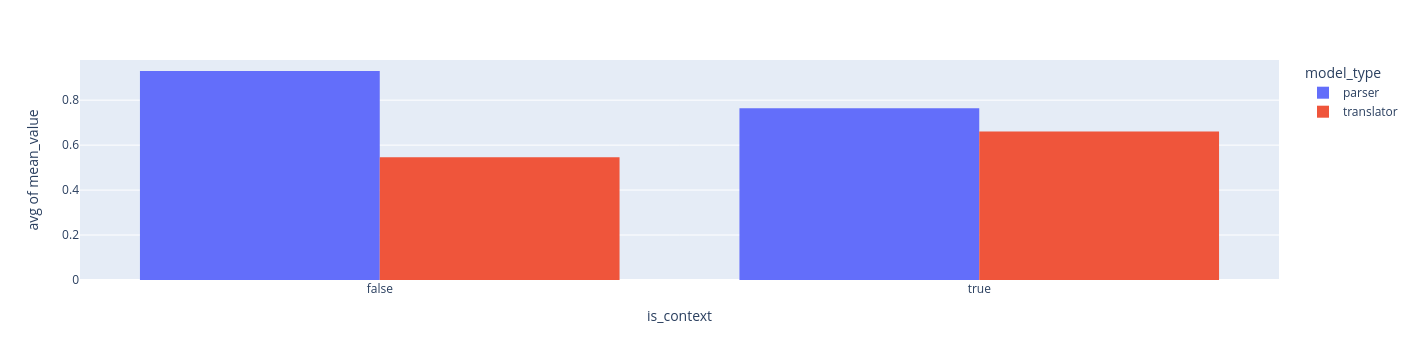

In [33]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# calculating a new column: mean value for every row 

for index, row in df_conditions.iterrows():
    metrics = ['intent_correct', 'cpc_name_correct','spc_length_correct', 'is_isomorphic', 'is_matched']
    values = []
    for m in metrics:
        if pd.isna(row[m]):
            values.append(False)
        else:
            values.append(row[m])
    mean_value = values.count(True)/len(values)
    df_conditions.at[index, "mean_value"] = mean_value

    # combining the model-type and context into one field 
    if row['is_context']:
        df_conditions.at[index, "model_condition"] = f"{row['model_type']} w/context"
    else:
        df_conditions.at[index, "model_condition"] = f"{row['model_type']}"


import plotly.express as px
# fig = px.histogram(df_conditions, x="spc_novelty", y="mean_value",
#              color='model_condition', barmode='group',
#              histfunc='avg',
#              height=400)

# fig.show()

fig = px.histogram(df_conditions, x="is_context", y="mean_value",
             color='model_type', barmode='group',
             histfunc='avg', width = 500)

fig.show()

In [ ]:
df.head()

# MISC


In [ ]:
camel_case_split("style:DirectnessStyleAugmenter")

In [ ]:
# spot test
with open(p_l3_fn, "r") as f:
    p_l3 = json.load(f)

In [ ]:
df = pd.DataFrame(p_l3)

In [ ]:
df.iloc[0]['evaluation']

In [ ]:
df = pd.DataFrame({'num_legs': [True, False, True, True],
                   'num_wings': [2, 0, 0, 0]},
                  index=['falcon', 'dog', 'cat', 'ant'])

In [ ]:
out = df.value_counts("num_legs", normalize=True)

In [ ]:
`out[True]

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Sample DataFrame (replace this with your actual DataFrame)
data = {
    'eval1': [True, False, True, False],
    'eval2': [False, True, True, True],
    'eval3': [True, True, False, True],
    'eval4': [False, False, True, True],
    'style': ['A', 'B', 'A', 'B'],
    'model': ['Model1', 'Model2', 'Model1', 'Model2']
}

df = pd.DataFrame(data)

# List of evaluation columns
eval_columns = ['eval1', 'eval2', 'eval3', 'eval4']

# Get unique styles
styles = df['style'].unique()

# Create subplots for each evaluation
fig, axes = plt.subplots(len(eval_columns), figsize=(10, 8), sharex=True)

# Define colors for models
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

# Iterate through each evaluation and plot grouped bars for each style
for i, eval_col in enumerate(eval_columns):
    ax = axes[i]
    ax.set_title(f'{eval_col} Counts by Style')
    
    # Filter the DataFrame for the current evaluation column
    eval_df = df[['style', 'model', eval_col]]
    
    # Pivot the DataFrame to have 'style' as columns and 'model' as rows
    pivot_df = eval_df.pivot_table(index='style', columns='model', values=eval_col, fill_value=False)
    
    # Create positions for grouped bars
    bar_positions = np.arange(len(styles))
    bar_width = 0.15
    
    # Plot grouped bars for each style with different colors
    for j, model in enumerate(pivot_df.columns):
        ax.bar(bar_positions + j * bar_width, pivot_df[model], width=bar_width, label=model, color=colors[j % len(colors)])

    ax.set_xticks(bar_positions + (len(pivot_df.columns) - 1) * bar_width / 2)
    ax.set_xticklabels(styles, rotation=45)  # Rotate x-axis tick labels by 45 degrees
    ax.legend(title='Model', loc='upper left', bbox_to_anchor=(1, 1))  # Move the legend outside

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Sample DataFrame (replace this with your actual DataFrame)
data = {
    'eval1': [True, False, True, False],
    'eval2': [False, True, True, True],
    'eval3': [True, True, False, True],
    'eval4': [False, False, True, True],
    'style': ['A', 'A', 'B', 'B'],
    'model': ['Model1', 'Model2', 'Model1', 'Model2']
}

df = pd.DataFrame(data)

# List of evaluation columns
eval_columns = ['eval1', 'eval2', 'eval3', 'eval4']

# Get unique styles
styles = df['style'].unique()

# Create subplots for each evaluation
fig, axes = plt.subplots(len(eval_columns), figsize=(10, 8), sharex=True)

# Define colors for models
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

# Iterate through each evaluation and plot the grouped bar chart
for i, eval_col in enumerate(eval_columns):
    ax = axes[i]
    ax.set_title(f'{eval_col} Counts by Style')
    
    # Filter the DataFrame for the current evaluation column
    eval_df = df[['style', 'model', eval_col]]
    
    # Pivot the DataFrame to have 'style' as columns and 'model' as rows
    pivot_df = eval_df.pivot_table(index='style', columns='model', values=eval_col, fill_value=False)
    
    # Create positions for bars
    bar_positions = np.arange(len(styles))
    bar_width = 0.15
    
    # Plot bars for each model with different colors
    for j, model in enumerate(pivot_df.columns):
        ax.bar(bar_positions + j * bar_width, pivot_df[model], width=bar_width, label=model, color=colors[j % len(colors)])

    ax.set_xticks(bar_positions + (len(pivot_df.columns) - 1) * bar_width / 2)
    ax.set_xticklabels(styles)
    ax.legend(title='Model')

plt.tight_layout()
plt.show()
